In [30]:

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print (color.BOLD + 'Telecom Churn ML Group Case Study' + color.END)

print("1. Business Goal - Retaining high value customers.")
print("2. This project is based on the Indian and Southeast Asian market.")
print("3. In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.")
print("4. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.")
print("5. Prepaid is the most common model in India and Southeast Asia.")

print("6. Churn definition used - 'Usage Based Churn':Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.")

print (color.BOLD + 'Output' + color.END)
print("1. Pridict which customers are at high risk of churn.")
print("2. Build predictive model to identify such high risk customers and identofy the main indicators of churn.")
print("3. Focus is on prepaid customers.")
print("4. Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :")
print("a: The ‘good’ phase, b: The ‘action’ phase, c:The ‘churn’ phase")





Telecom Churn ML Group Case Study
1. Business Goal - Retaining high value customers.
2. This project is based on the Indian and Southeast Asian market.
3. In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
4. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.
5. Prepaid is the most common model in India and Southeast Asia.
6. Churn definition used - 'Usage Based Churn':Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
Output
1. Pridict which customers are at high risk of churn.
2. Build predictive model to identify such high risk custo

In [31]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# line separator
def print_ln():
    print('_'*80,'\n')
pd.options.display.float_format = '{:.2f}'.format

In [32]:
# loading data file
tele_org = pd.read_csv("telecom_churn_data.csv")
tele=tele_org.copy()
print('Dataframe Shape:', tele.shape);print_ln();
print('Dataframe Info: \n'); tele.info();print_ln;
tele.head(5)

Dataframe Shape: (99999, 226)
________________________________________________________________________________ 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,...,0,1.00,1.00,1.00,nan,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,...,0,nan,1.00,1.00,nan,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,...,0,nan,nan,nan,1.00,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.34,...,0,nan,nan,nan,nan,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.64,...,0,0.00,nan,nan,nan,1526,0.00,0.00,0.00,0.00


In [33]:
round(100*(tele.isnull().sum()/len(tele.index)), 2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
                        ... 
arpu_2g_9              74.08
night_pck_user_6       74.85
night_pck_user_7       74.43
night_pck_user

In [34]:
print (color.BOLD + 'Treating Categorical Variables' + color.END)
print("There are 8 categorical variables with more than 70% missing values. Missing values can be imputed with '-1' where '-1' can be traeted as new category.")
print("1. night_pck_user_6")
print("2. night_pck_user_7")
print("3. night_pck_user_8")
print("4. night_pck_user_9")
print("5. fb_user_6")
print("6. fb_user_7")
print("7. fb_user_8")
print("8. fb_user_9")

# impputing the missing value with '-1'

cate_v=["night_pck_user_6","night_pck_user_7","night_pck_user_8","night_pck_user_9","fb_user_6","fb_user_7","fb_user_8","fb_user_9"]
for var in cate_v:
    tele[var].fillna(value=-1,inplace=True)

Treating Categorical Variables
There are 8 categorical variables with more than 70% missing values. Missing values can be imputed with '-1' where '-1' can be traeted as new category.
1. night_pck_user_6
2. night_pck_user_7
3. night_pck_user_8
4. night_pck_user_9
5. fb_user_6
6. fb_user_7
7. fb_user_8
8. fb_user_9


In [35]:
# Createing dummy variable for all above categories except the night_pck_user_9 and fb_user_9

night_pck_user_6d = pd.get_dummies(tele['night_pck_user_6'],prefix="night6", drop_first = True)
night_pck_user_7d = pd.get_dummies(tele['night_pck_user_7'],prefix="night7", drop_first = True)
night_pck_user_8d = pd.get_dummies(tele['night_pck_user_8'],prefix="night8", drop_first = True)
fb_user_6d = pd.get_dummies(tele['fb_user_6'],prefix="fb6", drop_first = True)
fb_user_7d = pd.get_dummies(tele['fb_user_7'],prefix="fb7", drop_first = True)
fb_user_8d = pd.get_dummies(tele['fb_user_8'],prefix="fb8", drop_first = True)

tele=pd.concat([tele,night_pck_user_6d],axis=1)
tele=pd.concat([tele,night_pck_user_7d],axis=1)
tele=pd.concat([tele,night_pck_user_8d],axis=1)
tele=pd.concat([tele,fb_user_6d],axis=1)
tele=pd.concat([tele,fb_user_7d],axis=1)
tele=pd.concat([tele,fb_user_8d],axis=1)

# dropping the categorical columns
tele=tele.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8'],1)

In [36]:
# columns with missing data >=70%
miss_data_col=round(100*(tele.isnull().sum()/len(tele.index)), 2)
miss_data_col[miss_data_col>+70]

date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_8   73.66
date_of_last_rech_data_9   74.08
total_rech_data_6          74.85
total_rech_data_7          74.43
total_rech_data_8          73.66
total_rech_data_9          74.08
max_rech_data_6            74.85
max_rech_data_7            74.43
max_rech_data_8            73.66
max_rech_data_9            74.08
count_rech_2g_6            74.85
count_rech_2g_7            74.43
count_rech_2g_8            73.66
count_rech_2g_9            74.08
count_rech_3g_6            74.85
count_rech_3g_7            74.43
count_rech_3g_8            73.66
count_rech_3g_9            74.08
av_rech_amt_data_6         74.85
av_rech_amt_data_7         74.43
av_rech_amt_data_8         73.66
av_rech_amt_data_9         74.08
arpu_3g_6                  74.85
arpu_3g_7                  74.43
arpu_3g_8                  73.66
arpu_3g_9                  74.08
arpu_2g_6                  74.85
arpu_2g_7                  74.43
arpu_2g_8 

In [37]:
# Columns more than 70% missing value and are used for filtering High Value customers cant be dropped
# total_rech_data_6          74.85
# total_rech_data_7          74.43
# av_rech_amt_data_6         74.85
# av_rech_amt_data_7         74.

print(tele.total_rech_data_6.describe());print_ln();
print(tele.total_rech_data_7.describe());print_ln();
print(tele.av_rech_amt_data_6.describe());print_ln();
print(tele.av_rech_amt_data_7.describe());print_ln();


count   25153.00
mean        2.46
std         2.79
min         1.00
25%         1.00
50%         1.00
75%         3.00
max        61.00
Name: total_rech_data_6, dtype: float64
________________________________________________________________________________ 

count   25571.00
mean        2.67
std         3.03
min         1.00
25%         1.00
50%         1.00
75%         3.00
max        54.00
Name: total_rech_data_7, dtype: float64
________________________________________________________________________________ 

count   25153.00
mean      192.60
std       192.65
min         1.00
25%        82.00
50%       154.00
75%       252.00
max      7546.00
Name: av_rech_amt_data_6, dtype: float64
________________________________________________________________________________ 

count   25571.00
mean      200.98
std       196.79
min         0.50
25%        92.00
50%       154.00
75%       252.00
max      4365.00
Name: av_rech_amt_data_7, dtype: float64
_____________________________________________

(array([1.4539e+04, 8.0550e+03, 1.8810e+03, 4.6500e+02, 3.0400e+02,
        1.4100e+02, 4.4000e+01, 4.4000e+01, 3.8000e+01, 1.3000e+01,
        1.3000e+01, 1.0000e+01, 7.0000e+00, 6.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.00000e-01, 1.75080e+02, 3.49660e+02, 5.24240e+02, 6.98820e+02,
        8.73400e+02, 1.04798e+03, 1.22256e+03, 1.39714e+03, 1.57172e+03,
        1.74630e+03, 1.92088e+03, 2.09546e+03, 2.27004e+03, 2.44462e+03,
        2.61920e+03, 2.79378e+03, 2.96836e+03, 3.14294e+03, 3.31752e+03,
        3.49210e+03, 3.66668e+03, 3.84126e+03, 4.01584e+03, 4.19042e+03,
        4.36500e+03]),
 <a list of 25 Patch objects>)

<Figure size 432x288 with 0 Axes>

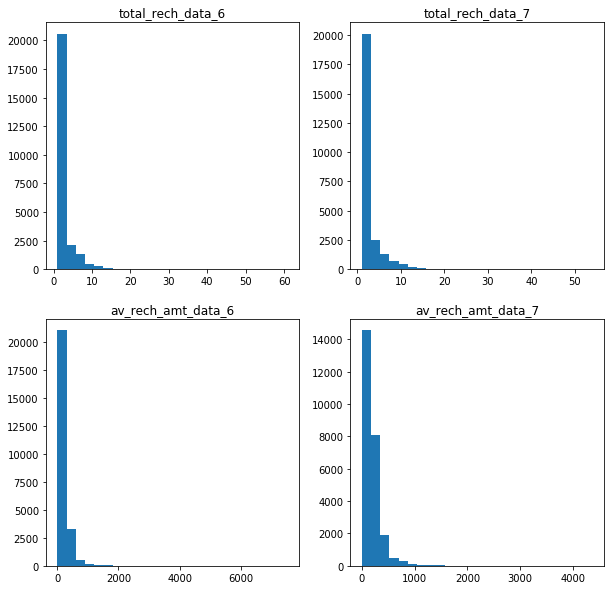

In [38]:
# looking at the date distirbution through plots
plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("total_rech_data_6")
plt.hist(tele.total_rech_data_6.dropna(),bins=25)

plt.subplot(2,2,2)
plt.title("total_rech_data_7")
plt.hist(tele.total_rech_data_7.dropna(),bins=25)

plt.subplot(2,2,3)
plt.title("av_rech_amt_data_6")
plt.hist(tele.av_rech_amt_data_6.dropna(),bins=25)

plt.subplot(2,2,4)
plt.title("av_rech_amt_data_7")
plt.hist(tele.av_rech_amt_data_7.dropna(),bins=25)




In [39]:
# the minimum value is 1 and not zero, and the distribution resmble power law
# the rows with missing values also have "dates of recharge" columns
# missing - indicates that no recharge was done in the specific month
# thus missing values can be imputed with '0'

#tele.total_rech_data_6.fillna(value=0,inplace=True)
#tele.total_rech_data_7.fillna(value=0,inplace=True)
#tele.total_rech_data_8.fillna(value=0,inplace=True)
#tele.total_rech_data_9.fillna(value=0,inplace=True)

#tele.av_rech_amt_data_6.fillna(value=0,inplace=True)
#tele.av_rech_amt_data_7.fillna(value=0,inplace=True)
#tele.av_rech_amt_data_8.fillna(value=0,inplace=True)
#tele.av_rech_amt_data_9.fillna(value=0,inplace=True)
collist = tele.columns[tele.isnull().any()].tolist() 
tele = tele.apply(lambda x: x.fillna(0) if x.name in collist else x.fillna(0))
print(round(100*(tele.isnull().sum()/len(tele.index)), 2))

mobile_number          0.00
circle_id              0.00
loc_og_t2o_mou         0.00
std_og_t2o_mou         0.00
loc_ic_t2o_mou         0.00
last_date_of_month_6   0.00
last_date_of_month_7   0.00
last_date_of_month_8   0.00
last_date_of_month_9   0.00
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            0.00
onnet_mou_7            0.00
onnet_mou_8            0.00
onnet_mou_9            0.00
offnet_mou_6           0.00
offnet_mou_7           0.00
offnet_mou_8           0.00
offnet_mou_9           0.00
roam_ic_mou_6          0.00
roam_ic_mou_7          0.00
roam_ic_mou_8          0.00
roam_ic_mou_9          0.00
roam_og_mou_6          0.00
roam_og_mou_7          0.00
roam_og_mou_8          0.00
roam_og_mou_9          0.00
loc_og_t2t_mou_6       0.00
                       ... 
sachet_2g_6            0.00
sachet_2g_7            0.00
sachet_2g_8            0.00
sachet_2g_9            0.00
monthly_3g_6        

In [40]:
# columns with missing data >=70%
miss_data_col1=round(100*(tele.isnull().sum()/len(tele.index)), 2)
miss_data_col1[miss_data_col1>=70]

Series([], dtype: float64)

In [41]:
drop_miss_data_col1=miss_data_col1[miss_data_col1>70].index
tele.drop(drop_miss_data_col1,axis=1,inplace=True)
print('Dataframe Shape:', tele.shape)
tele.info()

# Dropping incoming calls as they do not add to the revenue
tele.drop(axis=1, inplace=True, labels=tele.filter(regex='loc_ic_').columns)
tele.drop(axis=1, inplace=True, labels=tele.filter(regex='std_ic_').columns)
tele.drop(axis=1, inplace=True, labels=tele.filter(regex='isd_ic_').columns)
tele.drop(axis=1, inplace=True, labels=tele.filter(regex='spl_ic_').columns)
tele.drop(axis=1, inplace=True, labels=tele.filter(regex='ic_other').columns)




Dataframe Shape: (99999, 232)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 232 entries, mobile_number to fb8_1.0
dtypes: float64(173), int64(35), object(12), uint8(12)
memory usage: 169.0+ MB


In [42]:
print (color.BOLD + 'Filtering High Value Customers' + color.END)

# adding derived column "total recharge amount"
tele["total_rech_data_amt_6"]=tele["total_rech_data_6"]*tele["av_rech_amt_data_6"]
tele["total_rech_data_amt_7"]=tele["total_rech_data_7"]*tele["av_rech_amt_data_7"]
tele["total_rech_data_amt_8"]=tele["total_rech_data_8"]*tele["av_rech_amt_data_8"]
tele["total_rech_data_amt_9"]=tele["total_rech_data_9"]*tele["av_rech_amt_data_9"]

# dropping the original columns
drop_d_col=["total_rech_data_6","total_rech_data_7","total_rech_data_8","total_rech_data_9","av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","av_rech_amt_data_9"]
tele.drop(drop_d_col,axis=1,inplace=True)

tele['average_rechamt_67']=(tele["total_rech_amt_6"]+tele["total_rech_data_amt_6"]+tele["total_rech_amt_7"]+tele["total_rech_data_amt_7"])/2.0

tele['average_rechamt_67'].describe(percentiles=[.25,.5,.70,.80,.95,.99])




Filtering High Value Customers


count   99999.00
mean      485.33
std       869.42
min         0.00
25%       128.00
50%       275.00
70%       478.00
80%       656.50
95%      1512.00
99%      3363.51
max     61236.00
Name: average_rechamt_67, dtype: float64

In [43]:
tele=tele[tele['average_rechamt_67'] > 478 ]
tele.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 180 entries, mobile_number to average_rechamt_67
dtypes: float64(121), int64(35), object(12), uint8(12)
memory usage: 39.0+ MB


In [44]:
print (color.BOLD + 'Identying Churn' + color.END)
Y=tele["total_ic_mou_9"]+tele["total_og_mou_9"]+tele["vol_2g_mb_9"]+tele["vol_3g_mb_9"]

tele["churn"]=np.where(Y,0,1)

# dropping all 4th month columns
drop_4_col = [hdr for hdr in list(tele) if hdr.endswith("_9")]
drop_4_col +=["sep_vbc_3g"]
tele.drop(drop_4_col, axis=1,inplace=True)
print('Dataframe Shape: ', tele.shape)

Identying Churn
Dataframe Shape:  (29953, 139)


In [45]:
print (color.BOLD + 'Identying columns with no variance' + color.END)
tele_unique = tele.nunique().sort_values(ascending=False)
#print("Dataframe unique value:\n",tele_unique);print_ln()
# Identify columns with no information i.e. all entries are NA or same
# Finding coulmns with all null entries
tele_unique_zero=tele_unique[tele_unique ==0]
print("Dataframe unique value count is zero (all null values): \n",tele_unique_zero);print_ln();
drop_no_variance_col =list(tele_unique_zero.index)
# Identifying columns with all same value
tele_unique_one = tele_unique[tele_unique ==1]
print("Dataframe unique value count is one (all same values): \n",tele_unique_one);print_ln();
drop_no_variance_col +=list(tele_unique_one.index)
tele.drop(drop_no_variance_col, axis=1, inplace=True)
print('Dataframe Shape: ', tele.shape);print_ln();
print('No of columns dropped: ', len(drop_no_variance_col));print_ln();
print('Dataframe Shape: ', tele.shape);print_ln();
tele.head()


Identying columns with no variance
Dataframe unique value count is zero (all null values): 
 Series([], dtype: int64)
________________________________________________________________________________ 

Dataframe unique value count is one (all same values): 
 std_og_t2c_mou_7        1
std_og_t2c_mou_6        1
last_date_of_month_6    1
std_og_t2o_mou          1
loc_og_t2o_mou          1
circle_id               1
std_og_t2c_mou_8        1
dtype: int64
________________________________________________________________________________ 

Dataframe Shape:  (29953, 132)
________________________________________________________________________________ 

No of columns dropped:  7
________________________________________________________________________________ 

Dataframe Shape:  (29953, 132)
________________________________________________________________________________ 



,mobile_number,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,average_rechamt_67,churn
0,7000842753,7/31/2014,8/31/2014,197.38,214.82,213.80,0.00,0.00,0.00,0.00,...,1,0,1,0,1,252.00,252.00,252.00,559.00,1
7,7000701601,7/31/2014,8/31/2014,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,...,0,0,0,0,0,0.00,0.00,0.00,1185.00,1
8,7001524846,7/31/2014,8/31/2014,378.72,492.22,137.36,413.69,351.03,35.08,94.66,...,0,0,1,0,1,0.00,354.00,207.00,696.00,0
21,7002124215,7/31/2014,8/31/2014,514.45,597.75,637.76,102.41,132.11,85.14,757.93,...,0,0,0,0,0,0.00,0.00,0.00,640.00,0
23,7000887461,7/31/2014,8/31/2014,74.35,193.90,366.97,48.96,50.66,33.58,85.41,...,0,0,1,0,1,0.00,712.00,540.00,583.00,0


In [47]:
print (color.BOLD + 'Rows with missing values' + color.END)
print("Rows with missing values =",tele.isnull().all(axis=1).sum())
rows_mis_data=tele.isnull().sum(axis=1)
rows_mis_data[rows_mis_data >0]

Rows with missing values
Rows with missing values = 0


Series([], dtype: int64)

In [48]:
# small % of riws has >=27 missing values
# droping these rows
drop_row=tele.isnull().sum(axis=1) >=27
tele = tele[tele.isnull().sum(axis=1) <27]
print('Dataframe Shape: ', tele.shape)

Dataframe Shape:  (29953, 132)


In [49]:
rows_mis_data=tele.isnull().sum(axis=1)
rows_mis_data[rows_mis_data >0]

Series([], dtype: int64)

In [50]:
# looking at the column summary
df=round(100*(tele.isnull().sum()/len(tele.index)),2)
df[df>0]

Series([], dtype: float64)

In [51]:
print (color.BOLD + 'Fixing Dates' + color.END)
date_var=["date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8"]
tele[date_var].head()

Fixing Dates


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/21/2014,7/16/2014,8/8/2014
7,6/27/2014,7/25/2014,8/26/2014
8,6/25/2014,7/31/2014,8/30/2014
21,6/30/2014,7/31/2014,8/31/2014
23,6/18/2014,7/7/2014,8/24/2014


In [52]:
# converting to datetime
for col in date_var:
    tele[col]=pd.to_datetime(tele[col])
print(tele[date_var].info())
tele[date_var].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 3 columns):
date_of_last_rech_6    29953 non-null datetime64[ns]
date_of_last_rech_7    29953 non-null datetime64[ns]
date_of_last_rech_8    29953 non-null datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 936.0 KB
None


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,2014-06-21,2014-07-16,2014-08-08
7,2014-06-27,2014-07-25,2014-08-26
8,2014-06-25,2014-07-31,2014-08-30
21,2014-06-30,2014-07-31,2014-08-31
23,2014-06-18,2014-07-07,2014-08-24


In [53]:
# creating days column
import datetime

last_date_mont_6=datetime.datetime.strptime("30-06-2014","%d-%m-%Y")
last_date_mont_7=datetime.datetime.strptime("31-07-2014","%d-%m-%Y")
last_date_mont_8=datetime.datetime.strptime("31-08-2014","%d-%m-%Y")
tele["rech_days_left_6"]=(last_date_mont_6-tele.date_of_last_rech_6).astype('timedelta64[D]')
tele["rech_days_left_7"]=(last_date_mont_7-tele.date_of_last_rech_7).astype('timedelta64[D]')
tele["rech_days_left_8"]=(last_date_mont_8-tele.date_of_last_rech_8).astype('timedelta64[D]')
day_col=["rech_days_left_6","rech_days_left_7","rech_days_left_8"]
print(tele[day_col].info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 3 columns):
rech_days_left_6    29953 non-null float64
rech_days_left_7    29953 non-null float64
rech_days_left_8    29953 non-null float64
dtypes: float64(3)
memory usage: 936.0 KB
None


In [54]:
#dropping original date columns
tele.drop(date_var,axis=1,inplace=True)
tele1=tele.copy()
tele.shape


(29953, 132)

In [55]:
# looking at the column summary
df=round(100*(tele.isnull().sum()/len(tele.index)),2)
df[df>0]

Series([], dtype: float64)

In [56]:
tele[['rech_days_left_6','rech_days_left_7','rech_days_left_8']].describe()

,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,29953.00,29953.00,29953.00
mean,43.13,56.99,321.20
std,801.15,929.61,2251.17
min,0.00,0.00,0.00
25%,0.00,0.00,1.00
50%,2.00,2.00,3.00
75%,5.00,5.00,6.00
max,16251.00,16282.00,16313.00


In [57]:
# mean and median are different. Using median for recharge days left
tele.loc[np.isnan(tele['rech_days_left_6']),['rech_days_left_6']]=tele['rech_days_left_6'].median()
tele.loc[np.isnan(tele['rech_days_left_7']),['rech_days_left_7']]=tele['rech_days_left_7'].median()
tele.loc[np.isnan(tele['rech_days_left_8']),['rech_days_left_8']]=tele['rech_days_left_8'].median()
#Drop dummy columns for last date of the months
tele.drop(axis=1,inplace=True,labels=tele.filter(regex='last_date_of_month').columns)
tele.drop(axis=1,inplace=True,labels=tele.filter(regex='date_of_last_rech').columns)
tele.shape

(29953, 127)

In [58]:
print (color.BOLD + 'Checking for Outliers' + color.END)
# checking outliers at differnt percentiles
tele.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Checking for Outliers


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,average_rechamt_67,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,...,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00
mean,7001206086.45,558.82,561.16,508.89,260.90,268.05,234.35,373.80,378.23,335.12,...,0.05,0.48,456.39,528.96,463.64,1153.70,0.08,43.13,56.99,321.20
std,690810.17,460.87,480.03,502.14,459.85,480.30,458.75,482.71,499.14,481.99,...,0.23,0.50,1419.71,1477.10,1623.84,1359.53,0.27,801.15,929.61,2251.17
min,7000000074.00,-2258.71,-2014.05,-945.81,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,478.50,0.00,0.00,0.00,0.00
25%,7000609293.00,310.14,310.07,231.62,17.09,16.04,10.44,71.61,69.98,46.76,...,0.00,0.00,0.00,0.00,0.00,604.00,0.00,0.00,0.00,1.00
50%,7001203434.00,482.35,481.50,427.60,84.64,82.83,65.66,222.56,220.04,182.84,...,0.00,0.00,92.00,100.00,25.00,800.50,0.00,2.00,2.00,3.00
75%,7001803612.00,700.24,698.83,661.75,290.49,290.54,240.63,487.91,494.03,438.86,...,0.00,1.00,400.00,575.00,308.00,1209.00,0.00,5.00,5.00,6.00
90%,7002165195.80,994.41,996.17,977.55,754.56,784.83,666.27,896.42,916.36,823.88,...,0.00,1.00,1125.00,1374.00,1088.00,1992.00,0.00,11.00,10.00,12.00
95%,7002285169.60,1241.65,1261.89,1255.09,1135.81,1187.71,1075.38,1256.66,1272.43,1167.62,...,1.00,1.00,2065.00,2420.00,2257.60,2801.20,1.00,15.00,15.00,19.40
99%,7002385665.44,1985.39,1999.52,1986.74,2153.72,2202.86,2159.68,2330.36,2411.14,2191.73,...,1.00,1.00,5169.80,6205.44,5741.17,6097.94,1.00,22.00,21.00,16313.00


In [59]:
# most of the outliers are on the revenue data and the model being build on usage, hence not treating the outliers
print('Original dataframe shape: ',tele_org.shape);print_ln();
print('Original dataframe info: \n');tele_org.info();print_ln();
print('Original dataframe No of Nulls:', tele_org.isnull().sum().sum());print_ln();

print('Cleaned dataframe shape: ',tele.shape);print_ln();
print('Cleaned dataframe info: \n');tele.info();print_ln();
print('Cleaned dataframe No of Nulls:', tele.isnull().sum().sum());print_ln();

# Saving the Cleaned data
tele.to_csv("telecom_churn_clean.csv",sep=',', index=False)

Original dataframe shape:  (99999, 226)
________________________________________________________________________________ 

Original dataframe info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
________________________________________________________________________________ 

Original dataframe No of Nulls: 3594931
________________________________________________________________________________ 

Cleaned dataframe shape:  (29953, 127)
________________________________________________________________________________ 

Cleaned dataframe info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 127 entries, mobile_number to rech_days_left_8
dtypes: float64(88), int32(1), int64(26), uint8(12)
memory usage: 26.7 MB
________________________________________________________________________________ 

Cleaned dataf

In [60]:
# Checking data
churn = tele["churn"].value_counts()
churn_rate=churn[1]/(churn[1]+churn[0])
print("Total churn count ={} ".format(churn[1]))
print("Total not-churn count ={}".format(churn[0]))
print("Churn Rate ={:.2f}%".format(churn_rate*100))
print_ln()
       

Total churn count =2433 
Total not-churn count =27520
Churn Rate =8.12%
________________________________________________________________________________ 



In [61]:
# dropping mobile number
tele.drop('mobile_number',axis=1,inplace=True)

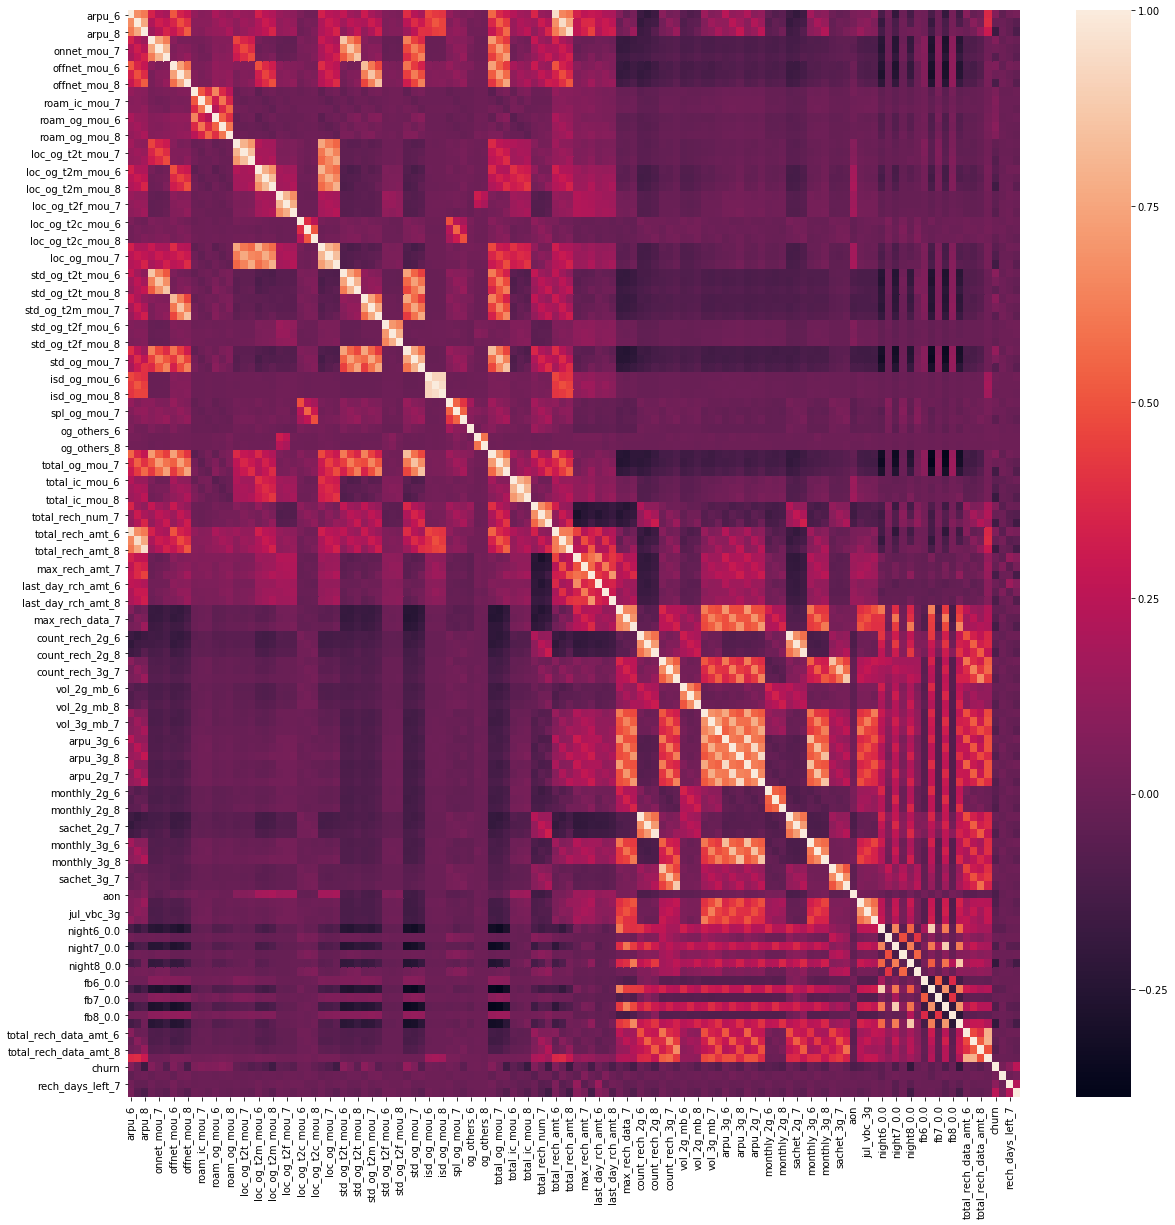

In [62]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(tele.corr())

In [63]:
##Dropping highly correlated variables.
##Some of the following columns are highly correlated (as seen from the colour coding), removing them from the further processing
##Maximum Recharge Data
##Outgoing STD
##CIRCLE ID
##local Outgoing to Other networks
##Average Usage
##Average Recharge Data
tele.drop(axis=1,inplace=True,labels=tele.filter(regex='max_rech_data').columns)
tele.drop(axis=1,inplace=True,labels=tele.filter(regex='std_og_t2').columns)
tele.drop(axis=1,inplace=True,labels=tele.filter(regex='circle_id').columns)
tele.drop(axis=1,inplace=True,labels=tele.filter(regex='loc_og_t2o_mou').columns)
tele.drop(axis=1,inplace=True,labels=tele.filter(regex='arpu_').columns)
tele.drop(axis=1,inplace=True,labels=tele.filter(regex='av_rech_amt_data').columns)
tele = tele.apply(pd.to_numeric)

In [64]:
print (color.BOLD + 'Create X, y variables' + color.END)

Create X, y variables


In [65]:
X = tele.drop(['churn'],axis=1)
y = tele['churn']
print (color.BOLD + 'Normalizing data' + color.END)

Normalizing data


In [66]:
df = tele[['aon','average_rechamt_67']]
normalized_df=(df-df.mean())/df.std()
tele = tele.drop(['aon','average_rechamt_67'], 1)
tele = pd.concat([tele,normalized_df],axis=1)
tele.select_dtypes(exclude=["int64","float64"]).columns

Index(['night6_0.0', 'night6_1.0', 'night7_0.0', 'night7_1.0', 'night8_0.0',
       'night8_1.0', 'fb6_0.0', 'fb6_1.0', 'fb7_0.0', 'fb7_1.0', 'fb8_0.0',
       'fb8_1.0', 'churn'],
      dtype='object')

In [67]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test =train_test_split(X,y,train_size=0.7,random_state=42)
print(X_train.shape)
print(X_test.shape)
X_train = X_train.apply(pd.to_numeric)
X_train.select_dtypes(exclude=["int64","float64"]).columns   

(20967, 104)
(8986, 104)


Index(['night6_0.0', 'night6_1.0', 'night7_0.0', 'night7_1.0', 'night8_0.0',
       'night8_1.0', 'fb6_0.0', 'fb6_1.0', 'fb7_0.0', 'fb7_1.0', 'fb8_0.0',
       'fb8_1.0'],
      dtype='object')

In [68]:
from sklearn.decomposition import PCA
pca=PCA(random_state=100)
pca.fit(X_train)
pca.components_

array([[-2.33747380e-02, -2.50628192e-02, -1.90433393e-02, ...,
        -3.95516592e-03, -1.82769224e-02, -1.14078372e-01],
       [-1.38714655e-02, -2.16300784e-02, -2.50467823e-02, ...,
         1.31462286e-02,  1.13252324e-01,  9.79782628e-01],
       [ 1.53998220e-01,  1.79242889e-01,  1.66352547e-01, ...,
         8.16129233e-05,  1.39341474e-02,  9.44101515e-02],
       ...,
       [ 0.00000000e+00, -1.37609640e-16,  1.32683499e-16, ...,
        -5.80457433e-20,  1.74930291e-20, -3.67297728e-20],
       [ 0.00000000e+00, -6.15498706e-17,  8.65315581e-17, ...,
         3.20216060e-20,  8.66532617e-20,  5.84479365e-21],
       [-0.00000000e+00, -4.68022626e-17,  3.58404558e-17, ...,
        -3.80737162e-21, -8.12179603e-21, -2.52829631e-20]])

In [72]:
colnames = list(X_train.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2], 'Feature':colnames})
pca_df[:21]

,PC1,PC2,PC3,Feature
0,-0.02,-0.01,0.15,onnet_mou_6
1,-0.03,-0.02,0.18,onnet_mou_7
2,-0.02,-0.03,0.17,onnet_mou_8
3,-0.03,-0.01,0.18,offnet_mou_6
4,-0.03,-0.02,0.20,offnet_mou_7
5,-0.02,-0.03,0.18,offnet_mou_8
6,-0.00,-0.00,0.00,roam_ic_mou_6
7,-0.00,-0.00,0.00,roam_ic_mou_7
8,-0.00,-0.00,0.00,roam_ic_mou_8
9,-0.00,-0.00,0.01,roam_og_mou_6


In [ ]:
pca.explained_variance_ratio_

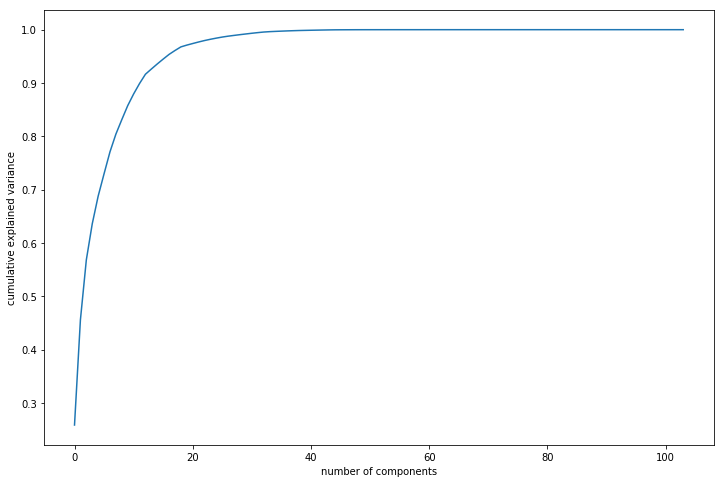

In [74]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [76]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

array([25.86, 45.6 , 56.83, 63.59, 68.78, 72.98, 77.09, 80.41, 83.12,
       85.74, 87.93, 89.89, 91.64, 92.61, 93.56, 94.47, 95.35, 96.08,
       96.76, 97.09, 97.39, 97.68, 97.95, 98.19, 98.41, 98.61, 98.78,
       98.92, 99.06, 99.19, 99.32, 99.44, 99.55, 99.62, 99.67, 99.72,
       99.76, 99.8 , 99.83, 99.86, 99.88, 99.9 , 99.92, 99.94, 99.96,
       99.97, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98])

In [77]:
#Looks like 18 components are enough to describe 95% of the variance in the dataset
#We'll choose 18 components for our modeling
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=18)
#Basis transformation - getting the data onto our PCs
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape                           

(20967, 18)

correlation matrix


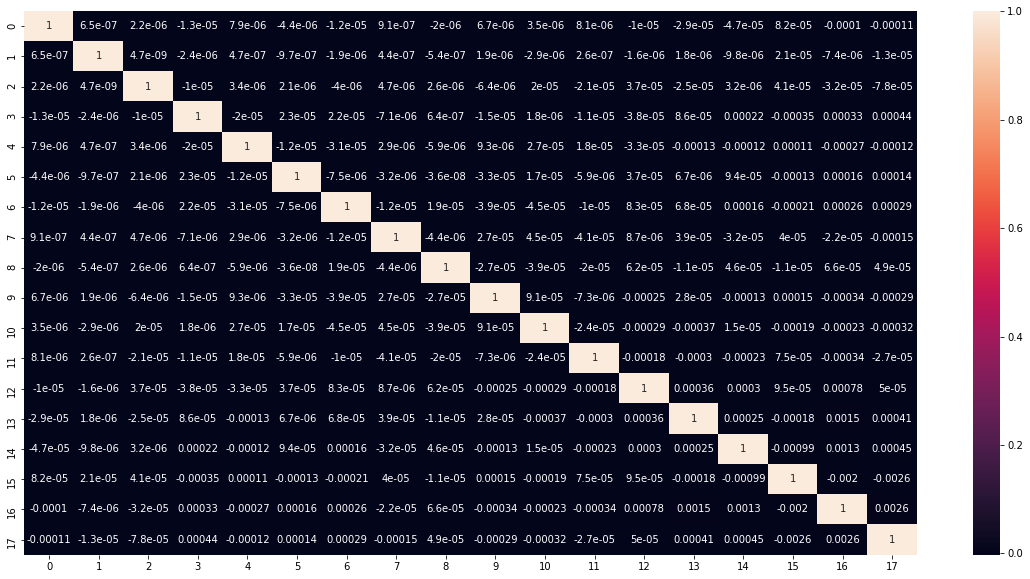

In [78]:
print (color.BOLD + 'correlation matrix' + color.END)
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [79]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.002581473910414423 , min corr:  -0.0026285339193842256


In [80]:
print (color.BOLD + 'We effectively have removed multicollinearity from our situation, and our models will be much more stable' + color.END)


We effectively have removed multicollinearity from our situation, and our models will be much more stable


In [81]:
#Applying selected components to the test data - 10 components
df_test_pca = pca_final.transform(X_test)
print(df_test_pca.shape)
print (color.BOLD + 'Applying Logistic Regression' + color.END)


(8986, 18)
Applying Logistic Regression


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
learner_pca=LogisticRegression()
model_pca=learner_pca.fit(df_train_pca,y_train)

# Predict on training set
y_pred=learner_pca.predict(df_train_pca)

# Is our model still predicting just one class?

print( np.unique( y_pred ) )
print(metrics.accuracy_score(y_train,y_pred))

[0 1]
0.9240711594410264


In [83]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.87'

In [84]:
pca_again = PCA(0.95)

In [85]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape
# we see that PCA selected 18 components

(20967, 17)

In [87]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)
# Predict on training set
y_pred_1 = learner_pca2.predict(df_train_pca2)
 
# Is our model still predicting just one class?
print( np.unique( y_pred_1))
# [0 1]
print(metrics.accuracy_score(y_train,y_pred_1))


[0 1]
0.9243096294176563


In [89]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(8986, 17)

In [90]:
#Making prediction on the test data
pred_probs_test2 = learner_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.87'

In [93]:
print (color.BOLD + 'So there it is a very similar result, without all the hassles. We have not only achieved dimensionality reduction, but also saved a lot of effort on feature selection.'
 + color.END);print_ln();

So there it is a very similar result, without all the hassles. We have not only achieved dimensionality reduction, but also saved a lot of effort on feature selection.
________________________________________________________________________________ 



In [94]:
print (color.BOLD + 'OBSERVATIONS' + color.END);print_ln();
print (color.BOLD + '1. Data is highly imbalance. only 8.12% data is churn and remaing non churn.' + color.END);
print (color.BOLD + '2. 87% accuracy with default PCA.' + color.END);
print (color.BOLD + '3. 95% variance can be explained by 18 columns and maintain 87% accuracy.' + color.END);
print (color.BOLD + '4. Key features are :- onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8 etc.' + color.END);
 # Though the setup is imbalanced, we could see that we are able to get both the states of the churn(0 and 1) with high accuracy (92%)- following Logistics regression."






OBSERVATIONS
________________________________________________________________________________ 

1. Data is highly imbalance. only 8.12% data is churn and remaing non churn.
2. 87% accuracy with default PCA.
3. 95% variance can be explained by 18 columns and maintain 87% accuracy.
4. Key features are :- onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8 etc.
